In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
DATA_FOLDER = '/Users/juliendibiaggio/ADA2024/ada-2024-project-dondata2025/data/raw/'

CHARACTER_METADATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_METADATASET = DATA_FOLDER+"movie.metadata.tsv"
PLOT_SUMMARIES = DATA_FOLDER+"plot_summaries.txt"

In [3]:
character = pd.read_csv(CHARACTER_METADATASET, delimiter='\t')
print("shape:", character.shape)

# Naming the columns of the dataframes
character.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date','Character_name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age', 'Freebase_character_map', 'Unknown1','Unknown2'] 

#creating a header line for the movie_metadata
character.head()

shape: (450668, 13)


,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [4]:
movie_metadata = pd.read_csv(MOVIE_METADATASET, delimiter='\t')
print("shape:", movie_metadata.shape)

# Naming the columns of the dataframes
movie_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'] 

#creating a header line for the movie_metadata
movie_metadata.head()

shape: (81740, 9)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [5]:
#Merge the two datasets
merged_data = pd.merge(character, movie_metadata, on='Wikipedia_movie_ID')
merged_data_two = pd.merge(character, movie_metadata, on='Wikipedia_movie_ID')

merged_data_two['Countries'] = merged_data_two['Countries'].str.extract(r':\s*\"([^\"]+)\"')
merged_data_two['Languages'] = merged_data_two['Languages'].str.extract(r':\s*\"(\w+)')

merged_data_two.shape

(450652, 21)

In [6]:
# Define a general function to parse JSON-like strings and extract data
def extract_data(data, column_name):
    if pd.notna(data):
        # Check if the entry is already a dictionary
        if isinstance(data, dict):
            data_dict = data
        else:
            try:
                # Try to convert a string representation of a dictionary to a dictionary
                data_dict = json.loads(data.replace("'", '"'))
            except Exception as e:
                return None  # Return None or some error message if conversion fails

        if column_name == 'Languages':
            # Remove the word 'Language' for language column
            return ', '.join(value.replace(" Language", "") for value in data_dict.values())
        elif column_name == 'Countries':
            # Directly join the values for countries
            return ', '.join(data_dict.values())
        elif column_name == 'Genres':
            # Extract genre names without the ID tags
            return ', '.join(genre.split(': ')[-1] for genre in data_dict.values())
        else:
            # Default behavior for other columns
            return ', '.join(data_dict.values())
    return None

In [7]:
#Delete the Revenue column
merged_data = merged_data.drop(columns=['Revenue'])
# Parse the 'Languages' column
merged_data['Countries'] = merged_data['Countries'].apply(lambda x: extract_data(x, 'Countries'))
# Parse the 'Countries' column
merged_data['Languages'] = merged_data['Languages'].apply(lambda x: extract_data(x, 'Languages'))
# Parse the 'Genres' column
merged_data['Genres'] = merged_data['Genres'].apply(lambda x: extract_data(x, 'Genres'))


In [8]:
merged_data.head(20)


,Wikipedia_movie_ID,Freebase_movie_ID_x,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Freebase_movie_ID_y,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


In [9]:
#Check if Freebase movie ID x and y are the same
merged_data[merged_data['Freebase_movie_ID_x'] != merged_data['Freebase_movie_ID_y']]

,Wikipedia_movie_ID,Freebase_movie_ID_x,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Freebase_movie_ID_y,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres


They are exactly the same, we can drop one of them and rename the other one

In [10]:
merged_data = merged_data.drop(columns=['Freebase_movie_ID_y'])
merged_data = merged_data.rename(columns={'Freebase_movie_ID_x': 'Freebase_movie_ID'})


In [11]:
merged_data.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


In [12]:
#Check if release date x and y are the same
merged_data[merged_data['Release_date_x'] != merged_data['Release_date_y']]

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
320,27374355,/m/0by1_ff,NaN,NaN,1953-03-16,F,1.60,NaN,Isabelle Huppert,NaN,/m/0bykcy4,NaN,/m/012g92,Les Indiens sont encore loin,NaN,95.0,,"France, Switzerland",Drama
477,10792038,/m/02qq3mb,NaN,NaN,1950-12-12,M,1.75,/m/0cqgdq,Rajnikanth,NaN,/m/03kxr5d,NaN,/m/02wmbg,Ethe Naasaval,NaN,NaN,Telugu language,India,"Action, Drama"
502,11717027,/m/02rpz18,NaN,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,NaN,/m/052c_g2,NaN,/m/0c5vh,Is There a Doctor in the Mouse?,NaN,NaN,English,United States of America,"Family Film, Comedy"
503,10628777,/m/02qkn7c,NaN,NaN,1964-01-15,F,1.69,NaN,Bhanupriya,NaN,/m/0jmx_q5,NaN,/m/08mdtm,Peddarayudu,NaN,NaN,Telugu language,India,Drama
504,10628777,/m/02qkn7c,NaN,NaN,1972-07-18,F,NaN,NaN,Soundarya,NaN,/m/0jmx290,NaN,/m/02vd_b,Peddarayudu,NaN,NaN,Telugu language,India,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450317,29119097,/m/0dlmtgr,NaN,NaN,NaN,M,NaN,NaN,Biswajit Chakraborty,NaN,/m/0hhz7cc,NaN,/m/0dgsd62,Target: The Final Mission,NaN,NaN,Bengali,,Action
450477,17198681,/m/043mrjw,NaN,NaN,1970-03-23,F,NaN,NaN,Melissa Errico,NaN,/m/0cmxspd,NaN,/m/0269llv,Loose Women,NaN,91.0,English,United States of America,Drama
450478,17198681,/m/043mrjw,NaN,Barbie Loving Bartender,1965-09-03,M,1.75,/m/042gtr,Charlie Sheen,NaN,/m/04fz126,/m/04fz129,/m/01pllx,Loose Women,NaN,91.0,English,United States of America,Drama
450479,17198681,/m/043mrjw,NaN,Make-up Lady,1967-04-02,F,NaN,/m/042gtr,Renée Estevez,NaN,/m/0h5mg_5,/m/0h5mg_7,/m/0331rx,Loose Women,NaN,91.0,English,United States of America,Drama


In [13]:
#Check if release date x and y are NaN for the same IDs
merged_data[merged_data['Release_date_x'].isna() & merged_data['Release_date_y'].isna()]

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
320,27374355,/m/0by1_ff,NaN,NaN,1953-03-16,F,1.60,NaN,Isabelle Huppert,NaN,/m/0bykcy4,NaN,/m/012g92,Les Indiens sont encore loin,NaN,95.0,,"France, Switzerland",Drama
477,10792038,/m/02qq3mb,NaN,NaN,1950-12-12,M,1.75,/m/0cqgdq,Rajnikanth,NaN,/m/03kxr5d,NaN,/m/02wmbg,Ethe Naasaval,NaN,NaN,Telugu language,India,"Action, Drama"
502,11717027,/m/02rpz18,NaN,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,NaN,/m/052c_g2,NaN,/m/0c5vh,Is There a Doctor in the Mouse?,NaN,NaN,English,United States of America,"Family Film, Comedy"
503,10628777,/m/02qkn7c,NaN,NaN,1964-01-15,F,1.69,NaN,Bhanupriya,NaN,/m/0jmx_q5,NaN,/m/08mdtm,Peddarayudu,NaN,NaN,Telugu language,India,Drama
504,10628777,/m/02qkn7c,NaN,NaN,1972-07-18,F,NaN,NaN,Soundarya,NaN,/m/0jmx290,NaN,/m/02vd_b,Peddarayudu,NaN,NaN,Telugu language,India,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450317,29119097,/m/0dlmtgr,NaN,NaN,NaN,M,NaN,NaN,Biswajit Chakraborty,NaN,/m/0hhz7cc,NaN,/m/0dgsd62,Target: The Final Mission,NaN,NaN,Bengali,,Action
450477,17198681,/m/043mrjw,NaN,NaN,1970-03-23,F,NaN,NaN,Melissa Errico,NaN,/m/0cmxspd,NaN,/m/0269llv,Loose Women,NaN,91.0,English,United States of America,Drama
450478,17198681,/m/043mrjw,NaN,Barbie Loving Bartender,1965-09-03,M,1.75,/m/042gtr,Charlie Sheen,NaN,/m/04fz126,/m/04fz129,/m/01pllx,Loose Women,NaN,91.0,English,United States of America,Drama
450479,17198681,/m/043mrjw,NaN,Make-up Lady,1967-04-02,F,NaN,/m/042gtr,Renée Estevez,NaN,/m/0h5mg_5,/m/0h5mg_7,/m/0331rx,Loose Women,NaN,91.0,English,United States of America,Drama


In [14]:
#Check if the last 2 lines are the same
(merged_data[merged_data['Release_date_x'] != merged_data['Release_date_y']].equals(merged_data[merged_data['Release_date_x'].isna() & merged_data['Release_date_y'].isna()]))

True

Meaning we can drop one of the columns and rename the other one

In [15]:
#Drop the Release_date_y column and rename the Release_date_x column
merged_data = merged_data.drop(columns=['Release_date_y'])
merged_data = merged_data.rename(columns={'Release_date_x': 'Release_date'})

In [16]:
merged_data.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2,Movie_name,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


### Obs

- sur quelle colonne on veut merge et pourquoi ?
- quelles colonnes on garde 
- https://www.kaggle.com/code/mahifar/movies-dataset-visualize-and-preprocess --> donnne des idées sur quoi faire pour le preprocessing
- uniformiser les dates




In [17]:
df_popo = pd.merge(movie_metadata, character, on=['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date' ])

In [18]:
df_popo.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


In [20]:
# Parse the 'Languages' column
df_popo['Countries'] = df_popo['Countries'].apply(lambda x: extract_data(x, 'Countries'))
# Parse the 'Countries' column
df_popo['Languages'] = df_popo['Languages'].apply(lambda x: extract_data(x, 'Languages'))
# Parse the 'Genres' column
df_popo['Genres'] = df_popo['Genres'].apply(lambda x: extract_data(x, 'Genres'))

In [21]:
df_popo.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Unknown1,Unknown2
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


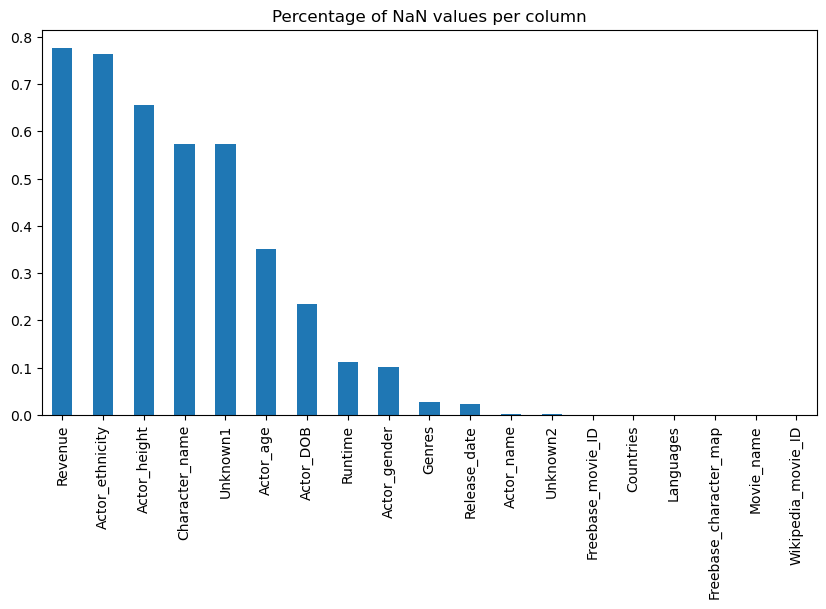

In [35]:
# Plot the percentage of NaN values in % per column
plt.figure(figsize=(10, 5))
df_popo.isnull().mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of NaN values per column')
plt.show()

In [36]:
# Print the percentage of NaN values in % per column
df_popo.isnull().mean().sort_values(ascending=False)

Revenue                   0.775856
Actor_ethnicity           0.764665
Actor_height              0.656464
Character_name            0.572224
Unknown1                  0.572202
Actor_age                 0.350845
Actor_DOB                 0.235528
Runtime                   0.111993
Actor_gender              0.101207
Genres                    0.027285
Release_date              0.022179
Actor_name                0.002725
Unknown2                  0.001808
Freebase_movie_ID         0.000000
Countries                 0.000000
Languages                 0.000000
Freebase_character_map    0.000000
Movie_name                0.000000
Wikipedia_movie_ID        0.000000
dtype: float64